In [0]:
!pip install pydub

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
from pydub import AudioSegment
import random
import sys
import io
import os
import glob
import IPython
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
from scipy.io import wavfile
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, CuDNNLSTM, Dropout
from keras.utils import to_categorical
from keras import optimizers
import pickle
from sklearn.linear_model import LogisticRegression
from scipy.signal import spectrogram
from sklearn.decomposition import PCA
plt.style.use('default')

In [0]:
path = '/content/gdrive/My Drive/coins'
data_path = '/content/gdrive/My Drive/coins/audio_data/binary'

In [0]:
p1 = pd.read_csv(path+'/p1.csv')
p1

,s29,s234,s206,s3,s293,s34,s303,s105,s254,s195,s236,s237,s276,s154,s343,s202,s7,s88,s60,s156,s45,s286,s16,s84,s2,s18,s151,s15,s4,s110,s149,s61,s250,s252,s148,s287,s10,s167,s65,s161,...,s176,s95,s128,s278,s42,s74,s177,s174,s143,s113,s239,s166,s13,s233,s224,s220,s240,s85,s296,s157,s213,s271,s160,s272,s247,s90,s212,s245,s291,s214,s270,s178,s147,s264,s241,s230,s211,s217,s86,sprzedaz
0,3.484400,3.412987,3.465000,3.449896,3.459197,3.470736,3.441965,3.446595,3.463836,3.466442,3.470359,3.466136,3.472794,3.476752,3.448967,3.443113,3.470959,3.429390,3.474444,3.444706,3.446536,3.476794,3.458318,3.641763,3.426066,3.466006,3.467634,3.459565,3.455497,3.433091,3.474835,3.472402,3.471163,3.410596,3.450350,3.383443,3.466486,3.435133,3.479394,3.484928,...,3.567824,3.410755,3.490000,3.490000,3.442861,3.453971,3.403573,3.431820,3.456984,3.483860,3.490000,3.418321,3.468454,3.480370,3.452568,3.486635,3.482973,3.478553,3.475792,3.433704,3.601099,3.502546,3.490212,3.592673,3.572215,3.437660,3.529465,3.429422,3.516574,3.476431,3.520947,3.479359,3.665267,3.473529,3.481860,3.442604,3.465428,3.443333,3.462913,60893.0
1,3.480278,3.433367,3.424214,3.455286,3.424450,3.457851,3.398639,3.415092,3.481034,3.446000,3.465148,3.490000,3.440388,3.476494,3.466986,3.287887,3.483137,3.457961,3.480789,3.356145,3.465159,3.483551,3.437765,3.616887,3.383158,3.436506,3.450484,3.440597,3.425000,3.412353,3.468462,3.462534,3.435845,3.426250,3.447928,3.422314,3.473253,3.405219,3.446087,3.490000,...,3.554854,3.471081,3.490000,3.480000,3.393060,3.460286,3.502310,3.431546,3.483396,3.371571,3.482391,3.346446,3.480667,3.460704,3.442545,3.437119,3.490000,3.461633,3.392298,3.318409,3.651713,3.525404,3.506179,3.544585,3.525144,3.424116,3.566034,3.366463,3.546564,3.453652,3.465496,3.438228,3.498593,3.441954,3.476410,3.466667,3.374708,3.490000,3.451528,50982.0
2,2.959254,2.881400,2.891020,2.946767,2.957477,2.950688,2.925970,2.907215,2.963826,2.970111,2.944327,2.990000,2.873313,2.925049,2.938031,2.881333,2.964507,2.887929,2.988430,2.920239,2.945211,2.987600,2.917663,3.083043,2.887163,2.950752,2.978750,2.910575,2.837670,2.919725,2.921978,2.907571,2.872615,2.936347,2.938889,2.882483,2.931973,2.928014,2.907333,2.983958,...,2.974673,2.828413,2.985000,2.990000,2.892932,2.977907,2.876272,2.954819,2.971100,2.981667,2.986341,2.866236,2.928140,2.972977,2.762800,2.969114,2.971325,2.876667,2.878154,2.882804,3.066656,3.029935,2.993849,3.018777,2.968833,2.927130,2.999533,2.814334,2.997679,2.959080,2.997808,2.956287,3.014042,2.934182,2.984727,2.890635,2.904812,2.952647,2.931171,74026.0
3,2.984595,2.949561,2.954503,2.935172,2.978407,2.967087,2.961525,2.928293,2.974623,2.965156,2.965960,2.990000,2.948502,2.919608,2.971209,2.953824,2.987000,2.985854,2.980992,2.976311,2.982638,2.980199,2.921304,2.988639,2.938199,2.946822,2.982407,2.973238,2.969882,2.958000,2.955463,2.967606,2.960602,2.980526,2.965462,2.980349,2.972727,2.948345,2.955380,2.980899,...,3.057333,2.976429,2.968214,2.990000,2.973401,2.961951,2.990749,2.953564,2.972979,2.972500,2.975510,2.901598,2.948986,2.978227,2.982914,2.984409,2.985565,2.976957,2.955881,2.959850,3.036811,2.962591,2.977727,2.978791,2.962497,2.981822,2.984213,2.928101,2.992272,2.983267,2.999558,2.983768,3.017871,2.957438,2.960400,2.906693,2.956179,2.897500,2.983333,75017.0
4,3.163226,3.158655,3.187914,3.190000,3.180533,3.179409,3.178962,3.179903,3.186579,3.188953,3.179070,3.164483,3.170033,3.181301,3.177581,3.180303,3.186265,3.178396,3.179741,3.176698,3.167714,3.186587,3.187279,3.175201,3.165870,3.169940,3.184655,3.174082,3.146964,3.164051,3.158667,3.167591,3.175740,3.183176,3.188100,3.189313,3.176569,3.177348,3.178911,3.182162,...,3.179763,3.173158,3.180000,3.187083,3.180269,3.190000,3.172908,3.180219,3.184795,3.186875,3.186735,3.177464,3.168313,3.173304,3.163443,3.164651,3.172727,3.182045,3.175814,3.177401,3.182115,3.175800,3.183372,3.183129,3.175945,3.183890,3.173048,3.177745,3.185533,3.173314,3.180499,3.174390,3.177610,3.165405,3.187885,3.183030,3.172201,3.122778,3.182235,6

In [0]:
def mape(y_true, y_pred):
    errs = np.sqrt(np.power(((y_true - y_pred) / y_true), 2))
    mean = (np.sum(errs) / errs.shape[0]) * 100
    return mean

In [0]:
X = p1.values
y = p1.values[:, 343]
yy = p1.values[:, 343]
X_test = p1.values[99:, :]
y_test = p1.values[99:, 343]
#X_train = X_train.reshape(X_train.shape[1], X_train.shape[0], 1)
pca = PCA(n_components=20)
pca.fit(X[:, :343])
print(pca.explained_variance_ratio_.sum())
pcx = pca.transform(X[:, :343])
#np.hstack((pcx, y))
pcx.shape
zeros = np.zeros([pcx.shape[0], 21])
zeros[:, 0] = y
zeros[:, 1:] = pcx
X = zeros

0.9932979408103706


In [0]:
X_test.shape
y_test.shape

(4,)

In [0]:
ile_tyg=80
X_train = []
target = []
for i in range(y.shape[0]-ile_tyg):
  X_train.append(y[i:ile_tyg+i])
  target.append(y[ile_tyg+i])

In [0]:
y = np.array(target)
X_train = np.array(X_train)
print(X_train.shape)
print(y_train.shape)

(23, 80)
(19,)


In [0]:
ile_tyg=80
trainy = []
testy = []
for i in range(X.shape[0]-ile_tyg):
  trainy.append(X[i:ile_tyg+i, :])
  testy.append(X_test[i:ile_tyg+i, :])

In [0]:
# 0 1 2 n
# 0 2 1 n
# 1 0 2 n
# 1 2 0 n
# 2 0 1 n
# 2 1 0
XX = np.array(trainy)

XX = XX.reshape(XX.shape[0], XX.shape[2], XX.shape[1])

XX.shape

(23, 21, 80)

In [0]:
X_train = XX[0:XX.shape[0]-4, :, :]
X_test = XX[XX.shape[0]-4:, :, :]
y_train = y[0:XX.shape[0]-4]
y_test = y[XX.shape[0]-4:]
y_test.shape

(4,)

In [0]:
lr = 9
batch = 1
ep = 10
val_split = 0
adam_opti = optimizers.Adam(lr=lr)

In [0]:
model = Sequential()
model.add(CuDNNLSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.03))
model.add(Dense(1))
model.compile(loss='mape', optimizer=adam_opti, metrics=['mape'])
model.summary()

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_97 (CuDNNLSTM)    (None, 128)               107520    
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 129       
Total params: 107,649
Trainable params: 107,649
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, batch, ep, validation_split=val_split)

Epoch 1/10
19/19 [==============================] - 0s 8ms/step - loss: 19.4171 - mean_absolute_percentage_error: 19.4171
Epoch 2/10
19/19 [==============================] - 0s 8ms/step - loss: 19.3736 - mean_absolute_percentage_error: 19.3736
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 20.1892 - mean_absolute_percentage_error: 20.1892
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 20.5565 - mean_absolute_percentage_error: 20.5565
Epoch 5/10
19/19 [==============================] - 0s 8ms/step - loss: 19.3158 - mean_absolute_percentage_error: 19.3158
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 18.9697 - mean_absolute_percentage_error: 18.9697
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 19.9863 - mean_absolute_percentage_error: 19.9863
Epoch 8/10
19/19 [==============================] - 0s 8ms/step - loss: 19.2166 - mean_absolute_percentage_error: 19.2166
Epoch 9/10
19/19 [======

In [0]:
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

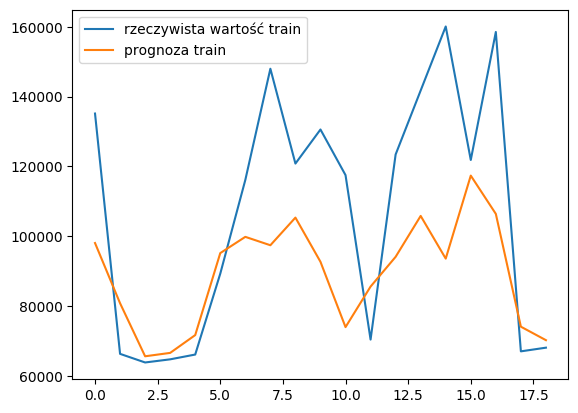

In [0]:
plt.plot(range(y_train.shape[0]), y_train, label='rzeczywista wartość train')
plt.plot(range(y_train.shape[0]), y_pred, label='prognoza train')
plt.legend()

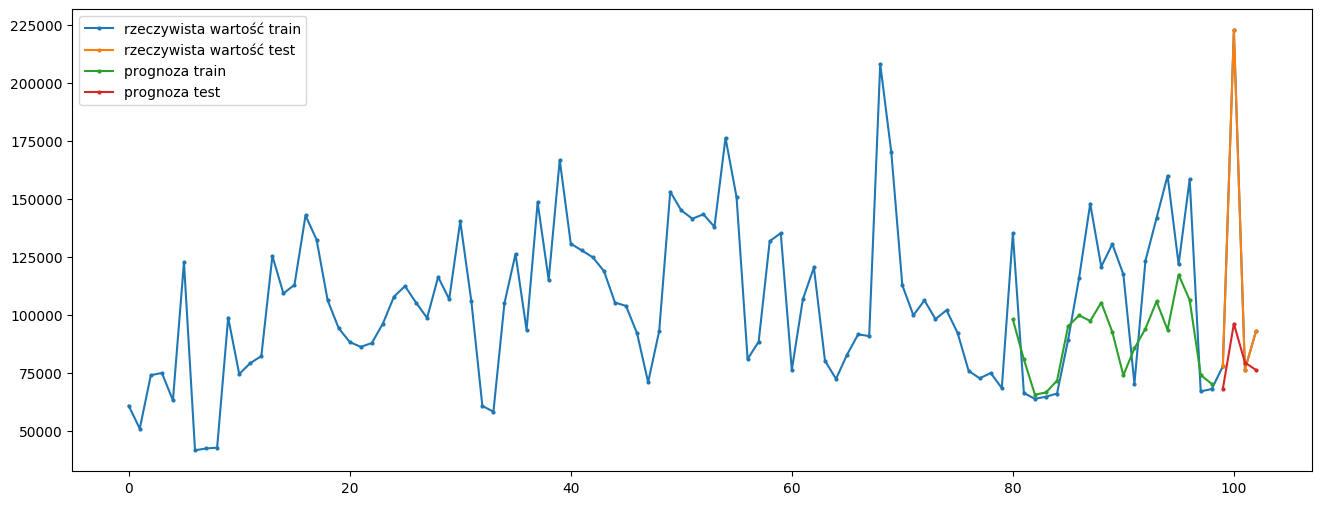

18.912097687537653
22.84023018430049


In [0]:
fig, ax = plt.subplots()
ax.plot(range(yy.shape[0]), yy, label='rzeczywista wartość train', marker='o', markersize=2)
ax.plot(range(99, 103), y_test, label='rzeczywista wartość test', marker='o', markersize=2)
ax.plot(range(ile_tyg, ile_tyg+y_pred.shape[0]), y_pred, label='prognoza train', marker='o', markersize=2)
ax.plot(range(99, 103), y_pred_test, label='prognoza test', marker='o', markersize=2)
ax.legend()
fig.set_size_inches([16, 6])
plt.show()
print(mape(y_train, y_pred[:, 0]))
print(mape(y_test, y_pred_test[:, 0]))

In [0]:
def mape(y_true, y_pred):
    errs = np.sqrt(np.power(((y_true - y_pred) / y_true), 2))
    mean = (np.sum(errs) / errs.shape[0]) * 100
    return mean

dict_keys(['loss', 'mean_absolute_percentage_error'])


KeyError: ignored

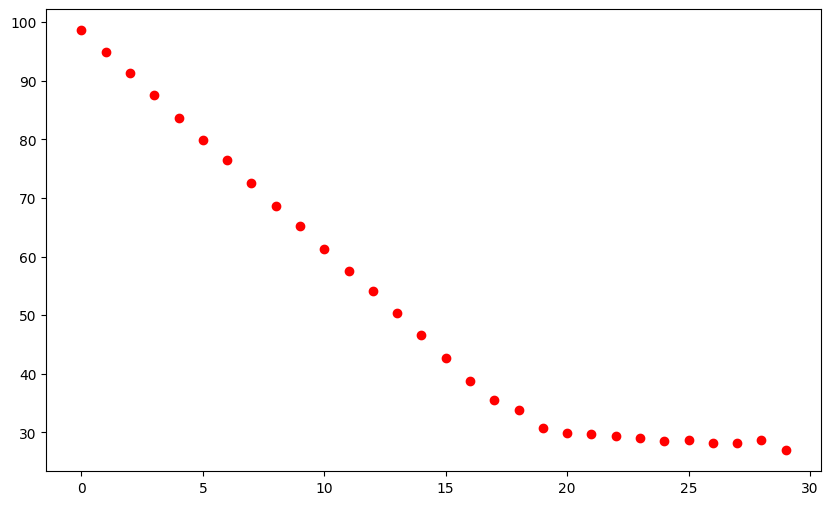

In [0]:
print(history.history.keys())
plt.figure(figsize=(10,6))
plt.scatter(range(ep), history.history['loss'], color='r')
plt.scatter(range(ep), history.history['val_loss'], color='g')
plt.show()

In [0]:
y_pred

array([[101187.19 ],
       [ 73353.086],
       [ 67379.7  ],
       [ 64666.05 ],
       [ 74492.19 ],
       [ 97791.78 ],
       [112524.266],
       [108635.3  ],
       [120371.31 ],
       [ 91895.17 ],
       [105904.38 ],
       [ 80180.94 ],
       [ 73877.93 ],
       [115518.15 ],
       [100996.945],
       [123540.06 ],
       [104213.08 ],
       [100787.68 ],
       [ 42729.363]], dtype=float32)

In [0]:
mape(y_train, y_pred[:, 0])
mape(y_test, y_pred_test[:, 0])

38.84130848639754

In [0]:
y_pred[:, 0]

array([101187.19 ,  73353.086,  67379.7  ,  64666.05 ,  74492.19 ,
        97791.78 , 112524.266, 108635.3  , 120371.31 ,  91895.17 ,
       105904.38 ,  80180.94 ,  73877.93 , 115518.15 , 100996.945,
       123540.06 , 104213.08 , 100787.68 ,  42729.363], dtype=float32)

In [0]:
def audios_to_list(folder_path):
    audios_names = os.listdir(folder_path)
    audios = []
    freqs = []
    sizes = []
    
    for audio in audios_names:
        freq, audio_arr = wavfile.read(folder_path + '/' + audio)
        audios.append(audio_arr)
        freqs.append(freq)
        sizes.append(audio_arr.size)
        
    max_len = max(sizes)
    
    if np.unique(freqs).size > 1: print('More than one freq in audio files!')
    else: freqs = freqs[0]
    
    return audios, freqs, max_len

In [0]:
def zero_pad(audios_list, max_length):
    max_length = max_length + 1 # first column for label
           
    padded_audios = np.zeros([len(audios_list), max_length])
    
    for audio_no in range(len(audios_list)):
        paste_start = max_length - len(audios_list[audio_no])
        padded_audios[audio_no, paste_start:] = audios_list[audio_no]
                    
    return padded_audios          

In [0]:
def create_dataset(dataset_folder):
    path = dataset_folder + '/'
    coins = os.listdir(path)

    audios_list, freq, max_len = audios_to_list(path + coins[0])
    
    for coin in coins:
        tup = audios_to_list(path + coin)
        if tup[1] != freq: print('More than one freq in audio files!')
        if tup[2] > max_len: max_len = tup[2]
    
    label = 0        
    dataset = zero_pad(audios_list, max_len)
    dataset[:, 0] = label
        
    for coin in coins[1:]:
        label += 1
        audios_list, _, _ = audios_to_list(path + coin)
        coin_class = zero_pad(audios_list, max_len)
        coin_class[:, 0] = label
        dataset = np.concatenate((dataset, coin_class))
            
    return dataset

In [0]:
dataset = create_dataset(data_path)

/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [0]:
dataset_f = open(path + '/dataset.pkl', 'wb')
pickle.dump(dataset, dataset_f)
dataset_f.close()

In [0]:
dataset_f = open(path + '/dataset.pkl', 'rb')
dataset = pickle.load(dataset_f)
dataset_f.close()

In [0]:
np.random.shuffle(dataset)
dataset.shape

(241, 117586)

In [0]:
X_train = dataset[:, 1:]
y = dataset[:, 0]
y_train = to_categorical(y, dtype='int8')
y_train[10, :]

array([1, 0], dtype=int8)

Number of freq: 101
Number of timesteps: 6532
Train set shape: (101, 6532)


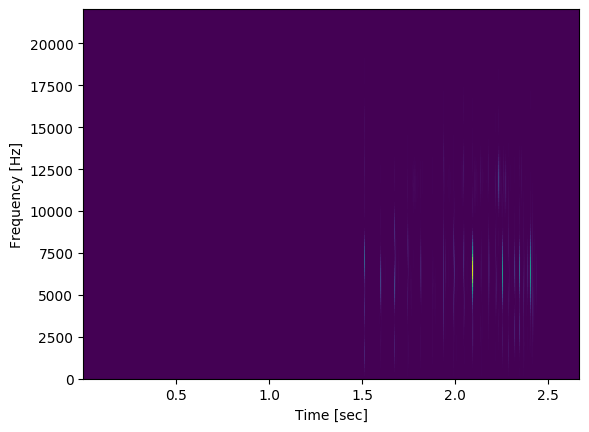

In [0]:
freq = 44100
nperseg = 20
nfft = 200

f, t, first_ex = spectrogram(X_train[10], fs=freq, window=('tukey', 0.25),
                       nperseg=nperseg, nfft=nfft)

print('Number of freq:', len(f))
print('Number of timesteps:', len(t))
print('Train set shape:', first_ex.shape)

plt.pcolormesh(t, f, first_ex)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [0]:
first_ex.shape

(51, 6532)

In [0]:
zeros = X_train.shape[0] * len(f) * len(t)
spec_dataset = np.zeros((X_train.shape[0], len(f), len(t)), dtype=np.float16)
print(spec_dataset.shape)

(241, 101, 6532)


In [0]:
i = 0

for example in X_train:
  
  spec = spectrogram(example, fs=freq, window=('tukey', 0.25),
                     nperseg=nperseg, nfft=nfft)
  
  spec_dataset[i] = spec[2] 

In [0]:
# X_train_f = open(path + '/X_train.pkl', 'wb')
y_train_f = open(path + '/y_train.pkl', 'wb')
#pickle.dump(X_train, X_train_f)
pickle.dump(y_train, y_train_f)
#X_train_f.close()
y_train_f.close()

In [0]:
y_train_f = open(path + '/y_train.pkl', 'rb')
y_train =  pickle.load(y_train_f)
y_train_f.close()

X_train_1_f = open(path + '/X_train_1.pkl', 'rb')
X_train_1 =  pickle.load(X_train_1_f)
X_train_1_f.close()

X_train_2_f = open(path + '/X_train_2.pkl', 'rb')
X_train_2 =  pickle.load(X_train_2_f)
X_train_2_f.close()

In [0]:
X_train = spec_dataset
X_train[0, :, :]

array([[0.       , 0.       , 0.       , ..., 0.0003676, 0.001821 ,
        0.02171  ],
       [0.       , 0.       , 0.       , ..., 0.002035 , 0.00413  ,
        0.0437   ],
       [0.       , 0.       , 0.       , ..., 0.00589  , 0.005516 ,
        0.04422  ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.01542  , 0.0002613,
        0.02505  ],
       [0.       , 0.       , 0.       , ..., 0.01576  , 0.0003734,
        0.0267   ],
       [0.       , 0.       , 0.       , ..., 0.007935 , 0.0002074,
        0.01364  ]], dtype=float16)

In [0]:
print(X_train.shape)

(241, 51, 6532)


In [0]:
lr = 0.05
batch = 1
ep = 10
val_split = 0.2
adam_opti = optimizers.Adam(lr=lr)

In [0]:
model = Sequential()
model.add(CuDNNLSTM(128, input_shape=X_train.shape[1:]))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=adam_opti, metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_4 (CuDNNLSTM)     (None, 128)               3410944   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 3,411,202
Trainable params: 3,411,202
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, batch, ep, validation_split=val_split)

Train on 192 samples, validate on 49 samples
Epoch 1/10
192/192 [==============================] - 3s 17ms/step - loss: 4.7059 - acc: 0.4948 - val_loss: 1.1921e-07 - val_acc: 0.5306
Epoch 2/10
192/192 [==============================] - 3s 14ms/step - loss: 1.1921e-07 - acc: 0.4948 - val_loss: 1.1921e-07 - val_acc: 0.5306
Epoch 3/10
192/192 [==============================] - 3s 14ms/step - loss: 1.1921e-07 - acc: 0.4948 - val_loss: 1.1921e-07 - val_acc: 0.5306
Epoch 4/10
192/192 [==============================] - 3s 14ms/step - loss: 1.1921e-07 - acc: 0.4948 - val_loss: 1.1921e-07 - val_acc: 0.5306
Epoch 5/10
192/192 [==============================] - 3s 14ms/step - loss: 1.1921e-07 - acc: 0.4948 - val_loss: 1.1921e-07 - val_acc: 0.5306
Epoch 6/10
192/192 [==============================] - 3s 14ms/step - loss: 1.1921e-07 - acc: 0.4948 - val_loss: 1.1921e-07 - val_acc: 0.5306
Epoch 7/10
192/192 [==============================] - 3s 14ms/step - loss: 1.1921e-07 - acc: 0.4948 - val_loss: 1

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


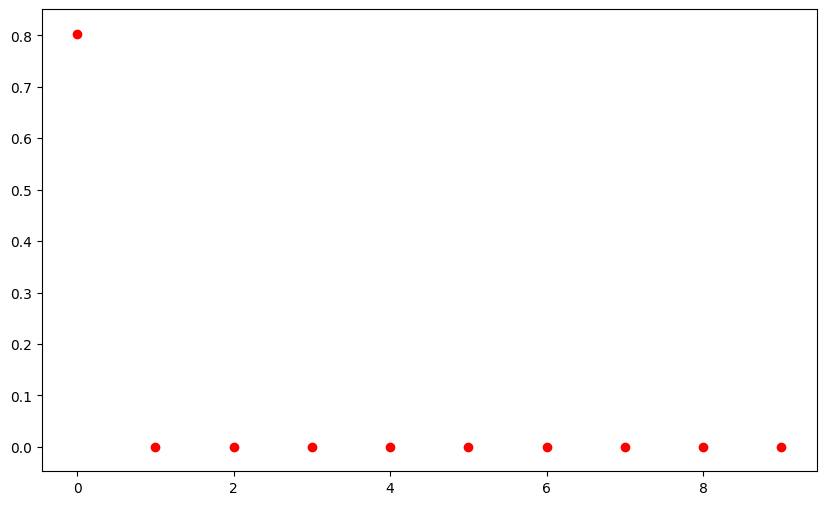

In [0]:
print(history.history.keys())
plt.figure(figsize=(10,6))
plt.scatter(range(ep), history.history['loss'], color='r')
#plt.scatter(range(ep), history.history['val_loss'], color='g')
plt.show()

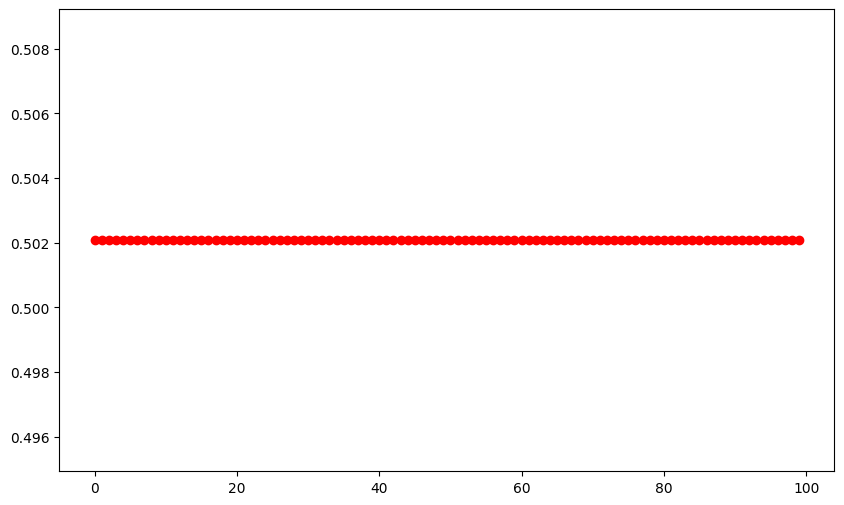

In [0]:
plt.figure(figsize=(10,6))
plt.scatter(range(ep), history.history['acc'], color='r')
#plt.scatter(range(ep), history.history['val_acc'], color='g')
plt.show()

In [0]:
x = X_train[30:50, :, :]
print(y_train[30:50])
model.predict(x)

[[1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]]


array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)

In [0]:
X_shape = X_train.shape
X_flat = np.reshape(X_train, (X_shape[0], X_shape[1] * X_shape[2]))

In [0]:
log_reg = LogisticRegression(solver='lbfgs', multi_class='multinominal')
log_reg.fit(X_flat, y_train)
log_reg.score(X_flat, y_train)

ValueError: ignored

In [0]:
model.save_weights('/content/gdrive/My Drive/coins/my_weights.h5')

In [0]:
inp = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
inp = inp.reshape((1, 10, 1))
print(inp.shape)

(1, 10, 1)


In [0]:
mod = Sequential()
mod.add(LSTM(128, input_shape=(10, 1)))
mod.add(Dense(1))

In [0]:
model = Sequential()
model.add(LSTM(32, input_shape=(10, 1)))
model.add(Dense(1))

In [0]:
dirs = os.listdir(data_path)
for name in dirs:
  print(name, len(os.listdir(data_path + '/' + name)))
names = os.listdir(data_path + '/one-zl')
print(len(dirs))

one-gr 121
five-gr 130
fifty-gr 115
two-gr 121
five-zl 118
ten-gr 120
two-zl 120
one-zl 120
twenty-gr 122
9


In [0]:
padded_one_zl = zero_pad(list_one_zl, max_one_zl )

padded_one_zl.shape

In [0]:
jeden = np.ones(3)
dwa = np.ones(5) * 2
trzy = np.ones(9) * 4
test_list = [jeden, dwa, trzy]
test_list

[array([1., 1., 1.]),
 array([2., 2., 2., 2., 2.]),
 array([4., 4., 4., 4., 4., 4., 4., 4., 4.])]

In [0]:
zero_pad(test_list, 9)

array([[0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 2., 2., 2., 2., 2.],
       [0., 4., 4., 4., 4., 4., 4., 4., 4., 4.]])

/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


257
1038


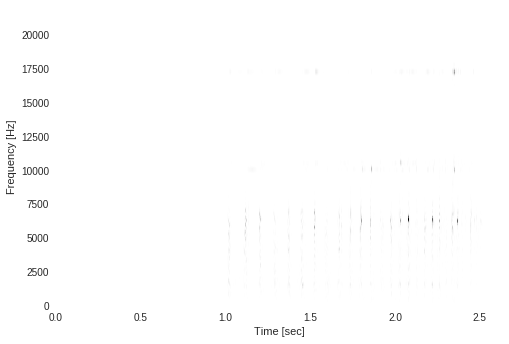

In [0]:
freq = wavfile.read(data_path + '/one-zl/one-zl-13.wav')[0]
specs = spectrogram(padded_one_zl, fs=freq, window=('tukey', 0.25), nperseg=128, nfft=512)
print(len(specs[0]))
print(len(specs[1]))

f, t, Sxx = specs

plt.pcolormesh(t, f, Sxx[100])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()